In [13]:
from qiskit import QuantumCircuit, Aer, execute
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
# Function to create and return a quantum circuit
def create_circuit(apply_x_gate=False):
    circuit = QuantumCircuit(1, 1)
    if apply_x_gate:
        circuit.x(0)  # Apply Pauli X gate
    circuit.measure(0, 0)
    return circuit

Circuit Before Applying Pauli X Gate:


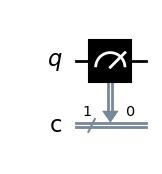

In [15]:
# Create circuit: before applying the Pauli X gate
circuit_before = create_circuit()
print("Circuit Before Applying Pauli X Gate:")
circuit_before.draw(output='mpl')


Circuit After Applying Pauli X Gate:


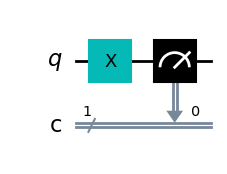

In [16]:
# Create circuit: after applying the Pauli X gate
circuit_after = create_circuit(apply_x_gate=True)
print("\nCircuit After Applying Pauli X Gate:")
circuit_after.draw(output='mpl')

In [17]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuits
job_before = execute(circuit_before, simulator)
job_after = execute(circuit_after, simulator)

# Grab results from the jobs
result_before = job_before.result()
result_after = job_after.result()

# Get the counts
counts_before = result_before.get_counts(circuit_before)
counts_after = result_after.get_counts(circuit_after)
print(f"Counts before: {counts_before}\nCounts after: {counts_after}")

Counts before: {'0': 1024}
Counts after: {'1': 1024}


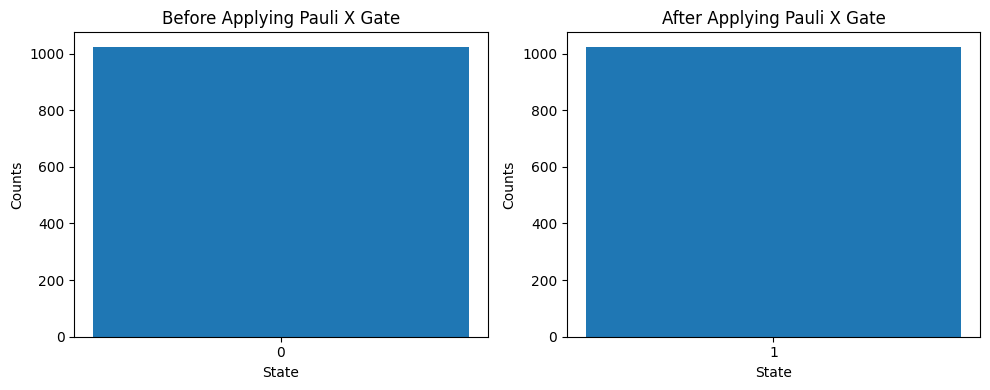

In [18]:
plt.figure(figsize=(10, 4))

# Plot before applying Pauli X gate
plt.subplot(1, 2, 1)
plt.bar(counts_before.keys(), counts_before.values())
plt.title("Before Applying Pauli X Gate")
plt.xlabel('State')
plt.ylabel('Counts')

# Plot after applying Pauli X gate
plt.subplot(1, 2, 2)
plt.bar(counts_after.keys(), counts_after.values())
plt.title("After Applying Pauli X Gate")
plt.xlabel('State')
plt.ylabel('Counts')

plt.tight_layout()